In [545]:
from pandas import read_excel, DataFrame,get_dummies
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os   
import statsmodels.api as sm
from pandas import concat
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from helper import my_logit,scailing,is_categorical,my_ols, independence_test, normality_test

In [546]:
df =read_excel("./한국복지패널_17차.xlsx")

In [547]:
colname = df.iloc[1]
df.columns = colname
df= df.drop(1)
df.reset_index(drop=True, inplace=True)

In [548]:
df

1,h17_pid,h17_id,h17_reg7,h17_din,new_h1701_2,new_h1701_3,new_h1701_4,new_h1701_5,new_h1701_6,new_h1703_4,...,wc17_30,wc17_39,new_h1703_5,h1707_3aq7,h1707_3aq8,h1707_3aq11,h1707_5aq3,h1707_5aq4,h1707_3aq2_2,h1707_3aq5_1
0,id,id,category,numeric,category,category,category,numeric,category,category,...,category,category,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
1,201,2,1,405,1,10,2,1945,4,9,...,0,0,0,5,63,15,3,8,80,15
2,301,3,1,2788,1,10,1,1948,3,2,...,0,0,0,2,23,2,46,2,65,24
3,401,4,1,2304,1,10,1,1942,7,3,...,0,0,0,5,17,5,18,16,43,21
4,601,6,1,5231,1,10,1,1962,6,1,...,2,2,0,13,24,13,53,11,118,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861,1200701,12007,5,4963,1,10,1,1981,6,1,...,0,0,2,11,11,4,25,13,113,17
7862,1200801,12008,5,9182,1,10,1,1977,7,1,...,0,0,0,6,32,35,61,17,152,19
7863,1200901,12009,5,8548,1,10,1,1976,7,5,...,0,0,2,21,50,2,36,16,131,18
7864,1201001,12010,2,8452,1,10,1,1975,7,1,...,0,0,1,13,5,5,20,10,130,16


In [549]:
numeric_columns = [col for col in df.columns if df.iloc[0][col] == 'numeric']
numeric_data = {col: df[col] for col in numeric_columns}
numeric_df = pd.DataFrame(numeric_data)
numeric_df = numeric_df.drop(0)

In [550]:
numeric_df

,h17_din,new_h1701_5,h1706_6,h1707_3aq9,h1707_3aq10,new_h1703_5,h1707_3aq7,h1707_3aq8,h1707_3aq11,h1707_5aq3,h1707_5aq4,h1707_3aq2_2,h1707_3aq5_1
1,405,1945,100000,0,0,0,5,63,15,3,8,80,15
2,2788,1948,500,0,0,0,2,23,2,46,2,65,24
3,2304,1942,40000,0,0,0,5,17,5,18,16,43,21
4,5231,1962,70000,6,137,0,13,24,13,53,11,118,37
5,1192,1940,0,0,0,0,2,14,1,1,3,33,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861,4963,1981,27000,0,0,2,11,11,4,25,13,113,17
7862,9182,1977,80000,4,140,0,6,32,35,61,17,152,19
7863,8548,1976,70000,2,60,2,21,50,2,36,16,131,18
7864,8452,1975,30000,0,30,1,13,5,5,20,10,130,16


In [551]:
numeric_df1 =numeric_df.rename(columns= 
{'h17_din':'disposable_income',
'new_h1701_5':"age",
"h1706_6":"house_price",
"h1707_3aq9":"pub_edu",
"h1707_3aq10":"priv_edu",
"new_h1703_5":"num_of_child",
"h1707_3aq2_2": "meal_out",
"h1707_3aq5_1": "utility_bills",
"h1707_3aq7": "apparel",
"h1707_3aq8": "insurance",
"h1707_3aq11":"entertainment",
"h1707_5aq3":"transportation",
"h1707_5aq4":"phone"})
numeric_df1[numeric_df1.columns] = numeric_df1[numeric_df1.columns].astype('int')
numeric_df1

,disposable_income,age,house_price,pub_edu,priv_edu,num_of_child,apparel,insurance,entertainment,transportation,phone,meal_out,utility_bills
1,405,1945,100000,0,0,0,5,63,15,3,8,80,15
2,2788,1948,500,0,0,0,2,23,2,46,2,65,24
3,2304,1942,40000,0,0,0,5,17,5,18,16,43,21
4,5231,1962,70000,6,137,0,13,24,13,53,11,118,37
5,1192,1940,0,0,0,0,2,14,1,1,3,33,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861,4963,1981,27000,0,0,2,11,11,4,25,13,113,17
7862,9182,1977,80000,4,140,0,6,32,35,61,17,152,19
7863,8548,1976,70000,2,60,2,21,50,2,36,16,131,18
7864,8452,1975,30000,0,30,1,13,5,5,20,10,130,16


#### 나이 컬럼 출생년도에서 2022년 기준 나이로 변환

In [552]:
numeric_df1['age'] = pd.Series([2022] * (len(numeric_df)-1)) - numeric_df1['age']

In [553]:
(numeric_df1==0).sum()

disposable_income       0
age                     0
house_price          1081
pub_edu              7002
priv_edu             6807
num_of_child         6409
apparel              5846
insurance            5627
entertainment        5816
transportation       5650
phone                5552
meal_out             5536
utility_bills        5537
dtype: int64

#### 0~17세 이하의 자녀가 있는 경우만을 고려

In [554]:
edf = numeric_df1[(numeric_df1['num_of_child'] != 0)]

In [555]:
for col in edf.columns:
    outlier =np.percentile(edf[col], 75) - np.percentile(edf[col],25)
    mean = edf[col].mean()
    std = edf[col].std()
    
    for index, value in enumerate(edf[col]):
        z_score = (value - mean) / std
        if abs(z_score) > outlier:
            edf.loc[index, col] = None  # Replace outlier with NaN

print(edf)

      disposable_income   age  house_price  pub_edu  priv_edu  num_of_child  \
9                5958.0  44.0      21000.0     88.0      67.0           1.0   
15               1969.0  61.0      25000.0      0.0       0.0           1.0   
16               3406.0  38.0     100000.0      0.0       0.0           1.0   
19               7586.0  50.0      17000.0      3.0      10.0           2.0   
25               4494.0  46.0       2500.0      0.0      42.0           2.0   
...                 ...   ...          ...      ...       ...           ...   
1372                NaN   NaN          NaN      NaN       NaN           NaN   
1403                NaN   NaN          NaN      NaN       NaN           NaN   
1421                NaN   NaN          NaN      NaN       NaN           NaN   
1424                NaN   NaN          NaN      NaN       NaN           NaN   
1428                NaN   NaN          NaN      NaN       NaN           NaN   

      apparel  insurance  entertainment  transporta

C:\Users\yis82\AppData\Local\Temp\ipykernel_76788\4073754640.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edf.loc[index, col] = None  # Replace outlier with NaN


In [556]:
edf.dropna(axis=0,inplace  = True)

In [557]:
(edf == 0).sum()

disposable_income       0
age                     0
house_price           106
pub_edu              1038
priv_edu              608
num_of_child            0
apparel              1183
insurance            1185
entertainment        1194
transportation       1183
phone                1180
meal_out             1180
utility_bills        1180
dtype: int64

#### 결측치 제거

In [558]:
edf = edf[~(edf == 0).any(axis=1)]
edf

,disposable_income,age,house_price,pub_edu,priv_edu,num_of_child,apparel,insurance,entertainment,transportation,phone,meal_out,utility_bills
9,5958.0,44.0,21000.0,88.0,67.0,1.0,17.0,34.0,20.0,51.0,25.0,120.0,33.0
19,7586.0,50.0,17000.0,3.0,10.0,2.0,45.0,20.0,27.0,26.0,19.0,118.0,18.0
31,9504.0,49.0,70000.0,19.0,325.0,1.0,28.0,37.0,43.0,50.0,15.0,135.0,11.0
56,4987.0,51.0,570.0,42.0,9.0,1.0,2.0,31.0,14.0,31.0,18.0,111.0,18.0
75,5787.0,53.0,10000.0,5.0,132.0,2.0,9.0,8.0,33.0,45.0,21.0,180.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7828,10937.0,51.0,60000.0,5.0,220.0,1.0,22.0,58.0,16.0,82.0,37.0,136.0,17.0
7840,9566.0,45.0,70000.0,2.0,180.0,2.0,25.0,7.0,17.0,51.0,12.0,104.0,14.0
7856,7742.0,38.0,10000.0,1.0,89.0,2.0,11.0,24.0,46.0,22.0,12.0,123.0,16.0
7860,12027.0,45.0,25000.0,3.0,73.0,1.0,30.0,57.0,8.0,354.0,26.0,135.0,13.0


In [563]:
log_edf = np.log(edf)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X= edf.drop('priv_edu',axis=1)
y = edf['priv_edu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the scaler on training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
r2

0.013067294568503307

In [570]:
model = my_ols(log_edf,'priv_edu', ['disposable_income', 'age', 'house_price', 'pub_edu', 'num_of_child', 'meal_out', 'utility_bills', 'apparel',
       'insurance', 'entertainment', 'transportation', 'phone'])
model.summary

['disposable_income', 'age', 'house_price', 'pub_edu', 'priv_edu', 'num_of_child', 'apparel', 'insurance', 'entertainment', 'transportation', 'phone', 'meal_out', 'utility_bills']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     3.216
Date:                Thu, 17 Aug 2023   Prob (F-statistic):            0.00157
Time:                        14:12:32   Log-Likelihood:                -70.016
No. Observations:                  67   AIC:                             166.0
Df Residuals:                      54   BIC:                             194.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7291      4.999     -0.146      0.885     -10.752       9.294
disposable_income     0.5625      0.319      1.764      0.083      -0.077       1.202
age                  -1.3273      1.191     -1.114      0.270      -3.716       1.061
house_price           0.1781      0.108      1.643      0.106      -0.039       0.395
pub_edu               0.0409      0.101      0.405      0.687      -0.162       0.244
num_of_child          0.3089      0.252      1.225      0.226      -0.197       0.814
meal_out              0.9505      0.521      1.825      0.074      -0.094       1.995
utility_bills        -0.4658      0.372     -1.252      0.216      -1.212       0.280
apparel              -0.0045      0.201     -0.022      0.982      -0.407       0.398
insurance             0.0617      0.105      0.586      0.560      -0.149       0.273
entertainment        -0.1237      0.108     -1.147      0.256      -0.340       0.093
transportation        0.0489      0.145      0.337      0.738      -0.242       0.340
phone                -0.1160      0.311     -0.373      0.711      -0.740       0.508
==============================================================================
Omnibus:                        6.195   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.381
Skew:                          -0.577   Prob(JB):                       0.0678
Kurtosis:                       3.772   Cond. No.                         905.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
categorical_columns = [col for col in df.columns if df.iloc[0][col] == 'category']
categorical_columns
categorical_data = {col: df[col] for col in categorical_columns}
category_df = pd.DataFrame(categorical_data)
category_df= category_df.drop(0)
category_df

,h17_reg7,new_h1701_2,new_h1701_3,new_h1701_4,new_h1701_6,new_h1703_4,h1706_1,p1703_6,p1703_7,p1703_8,p1703_9,p1703_12,wc17_8aq6,wc17_8aq8,wc17_8,wc17_29,wc17_30,wc17_39
1,1,1,10,2,4,9,2,1,3,3,2,1,0,0,0,0,0,0
2,1,1,10,1,3,2,2,4,4,4,4,4,0,0,0,0,0,0
3,1,1,10,1,7,3,1,2,5,2,4,4,0,0,0,0,0,0
4,1,1,10,1,6,1,2,3,4,5,4,4,4,4,2,2,2,2
5,2,1,10,2,3,4,5,2,3,2,3,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7861,5,1,10,1,6,1,5,4,4,4,4,4,0,0,0,0,0,0
7862,5,1,10,1,7,1,5,4,4,4,4,4,0,0,0,0,0,0
7863,5,1,10,1,7,5,5,4,4,4,4,4,0,0,0,0,0,0
7864,2,1,10,1,7,1,5,3,4,4,4,4,0,0,0,0,0,0


In [ ]:
category_df[category_df.columns] = category_df[category_df.columns].astype('category')
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7865 entries, 1 to 7865
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   h17_reg7     7865 non-null   category
 1   new_h1701_2  7865 non-null   category
 2   new_h1701_3  7865 non-null   category
 3   new_h1701_4  7865 non-null   category
 4   new_h1701_6  7865 non-null   category
 5   new_h1703_4  7865 non-null   category
 6   h1706_1      7865 non-null   category
 7   p1703_6      7865 non-null   category
 8   p1703_7      7865 non-null   category
 9   p1703_8      7865 non-null   category
 10  p1703_9      7865 non-null   category
 11  p1703_12     7865 non-null   category
 12  wc17_8aq6    7865 non-null   category
 13  wc17_8aq8    7865 non-null   category
 14  wc17_8       7865 non-null   category
 15  wc17_29      7865 non-null   category
 16  wc17_30      7865 non-null   category
 17  wc17_39      7865 non-null   category
dtypes: category(18)
memory usage

#### 결측치 확인

In [ ]:
(category_df==0).sum()

h17_reg7          0
new_h1701_2       0
new_h1701_3       0
new_h1701_4       0
new_h1701_6       0
new_h1703_4       0
h1706_1           0
p1703_6         310
p1703_7         310
p1703_8         310
p1703_9         310
p1703_12        310
wc17_8aq6      6330
wc17_8aq8      6330
wc17_8         6330
wc17_29        6330
wc17_30        6330
wc17_39        6330
dtype: int64

##### wc 카테고리들은 결측치가 데이터의 20%보다 많기 떄문에 변수로서 의미가 없다고 판단하여 삭제한다.
##### 또한 결측치 행들도 삭제

In [ ]:
category_df = category_df.drop(["wc17_8aq6","wc17_8aq8","wc17_8", "wc17_29","wc17_30","wc17_39"],axis=1)
category_df = category_df[~(category_df == 0).any(axis=1)]


(category_df==0).sum()

h17_reg7       0
new_h1701_2    0
new_h1701_3    0
new_h1701_4    0
new_h1701_6    0
new_h1703_4    0
h1706_1        0
p1703_6        0
p1703_7        0
p1703_8        0
p1703_9        0
p1703_12       0
dtype: int64

#### 범주형 변수 단순화 작업

#### 7개 권역별 지역구분

- 기존 분류 기준 
    1. 서울          2. 수도권(인천/경기)    3. 부산/경남/울산   4.대구/경북   
    5. 대전/충남/세종   6. 강원/충북               7.광주/전남/전북/제주도\

- 재분류 기준

    1, 2 >>> 1(수도권)
    
    3,4,5,6,7 >>>> 2(비수도권) 

In [ ]:
district = DataFrame(category_df['h17_reg7'])
district = district.reset_index(drop=True)
district['h17_reg7'] = district['h17_reg7'].cat.set_categories(district['h17_reg7'].cat.categories)
district['h17_reg7'] = district['h17_reg7'].replace([1,2], 1)
district['h17_reg7'] = district['h17_reg7'].replace([3,4,5,6,7], 2)
district.rename(columns={'h17_reg7':'area'},inplace=True)
district

,area
0,1
1,1
2,1
3,1
4,1
...,...
7550,2
7551,2
7552,2
7553,1


#### 주택 유형

기존 주택 유형
|주택 유형|   |
|---|---|
1.일반단독주택       | 7.점포주택 등 복합용도 주택
2.다가구용 단독주택 |8.비거주용 건물 내 주택(상가,공장 등)
3.다세대주택        | 9.오피스텔
4.연립주택(빌라)   |10.비닐하우스, 움막, 판잣집
5.일반아파트        |11.임시가건물(컨테이너, 재개발지역 가이주단지 포함)
6.영구임대아파트   |12. 기타  
|13. 국민공공임대아파트"|
--------------------------------------------------------------------------

|재분류 후 주택 유형||
|---|---|
|1,2,3,4,9| 1. 일반 주택|
|5,7,8|2. 아파트|
|6,10,11,12|3. 복지 주택|

In [ ]:
house_type = DataFrame(category_df['h1706_1'])
house_type = house_type.reset_index(drop=True)
house_type['h1706_1'] = house_type['h1706_1'].cat.set_categories(house_type['h1706_1'].cat.categories)
house_type['h1706_1'] = house_type['h1706_1'].replace([1,2,3,4,9], 1)
house_type['h1706_1'] = house_type['h1706_1'].replace([5,7,8], 2)
house_type['h1706_1'] = house_type['h1706_1'].replace([6,10,11,12,13], 3)
house_type.rename(columns={'h1706_1':'house_type'},inplace=True)
house_type

,house_type
0,1
1,1
2,1
3,1
4,2
...,...
7550,2
7551,2
7552,2
7553,2


경제활동 참여상태 재분류

- 1,5,6 종신 근로자(1)
- 2,3,4 임시 근로자(2)
- 7,8,9 비임금 종사자(3)


In [ ]:
employee_type = DataFrame(category_df['new_h1703_4'])
employee_type = employee_type.reset_index(drop=True)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].cat.set_categories(employee_type['new_h1703_4'].cat.categories)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].replace([1, 5,6], 1)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].replace([2,3,4], 2)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].replace([7,8,9,], 3)
employee_type.rename(columns={'new_h1703_4':'employee_type'},inplace=True)
employee_type

,employee_type
0,3
1,2
2,2
3,1
4,2
...,...
7550,1
7551,1
7552,1
7553,1


In [ ]:
education_level = DataFrame(category_df['new_h1701_6'])
education_level = education_level.reset_index(drop=True)
education_level['new_h1701_6'] = education_level['new_h1701_6'].astype('category')
education_level['new_h1701_6'] = education_level['new_h1701_6'].cat.set_categories([1, 2, 3, 4, 5, 6, 7, 8, 9])
education_level['new_h1701_6'] = education_level['new_h1701_6'].replace([1, 2, 3, 4, 5], 1)
education_level['new_h1701_6'] = education_level['new_h1701_6'].replace([6, 7, 8, 9], 2)
education_level.rename(columns={'new_h1701_6':'education_level'},inplace=True)
education_level

,education_level
0,1
1,1
2,2
3,2
4,1
...,...
7550,2
7551,2
7552,2
7553,2


[1,2] >> 불만족
3 >> 보통
[4,5] >> 만족

In [ ]:
def variable_maker(nameOfcolumn,colname,myname):
    nameOfcolumn = DataFrame(category_df[colname])
    nameOfcolumn = nameOfcolumn.reset_index(drop=True)
    nameOfcolumn[colname] = nameOfcolumn[colname].cat.set_categories(nameOfcolumn[colname].cat.categories)
    nameOfcolumn[colname] = nameOfcolumn[colname].replace([1,2],1)
    nameOfcolumn[colname] = nameOfcolumn[colname].replace([3],2)
    nameOfcolumn[colname] = nameOfcolumn[colname].replace([4,5],3)
    nameOfcolumn.rename(columns={colname:myname},inplace = True)
    return nameOfcolumn

In [ ]:
income_sat = variable_maker('income_sat','p1703_6','income_sat')
residential_sat= variable_maker('residential_sat',"p1703_7",'residential_sat')
family_sat = variable_maker('family_sat','p1703_8','family_sat')
job_sat = variable_maker('job_sat','p1703_9','job_sat')
general_sat = variable_maker('geneal_sat','p1703_12','general_sat')


In [ ]:
new_cat_df = concat([house_type,employee_type,education_level,income_sat,residential_sat,family_sat,job_sat,general_sat],axis=1)
cat_df=get_dummies(new_cat_df,dtype=int)
cat_df = cat_df.drop(['income_sat_0',"residential_sat_0","family_sat_0","job_sat_0",'general_sat_0'],axis=1)

In [593]:
education_level = get_dummies(education_level,dtype=int)
type(education_level) 

pandas.core.frame.DataFrame

#### 연구 내용
 ##### 가설 1) 가구주의 유복한 성장 과정이 사교육비에 긍정적인 영향을 끼친다.

 사용할 변수
 |변수 이름|설명|
 |---|---|
 |부모의 교육수준|교육수준 1~5=고졸이하(1) 6,7,8,9 대졸이상(2)|
 |부모의 연령 | 2022년 기준 나이|
 |가처분소득| 처분 가능한 소득|

In [ ]:
from scipy.stats import skew, kurtosis

가처분소득 데이터가 정규성을 따르지 않기 떄문에 log 변환을 하여 정규성을 따르는 데이터로 변환을 하였다.

In [571]:
normaltest(edf['disposable_income'])

NormaltestResult(statistic=87.1644407291572, pvalue=1.1816318446356338e-19)

In [572]:
normaltest(log_edf['disposable_income'])

NormaltestResult(statistic=16.18065275086589, pvalue=0.0003064897100957584)

(array([ 5., 10., 12., 23.,  7.,  6.,  2.,  1.,  0.,  1.]),
 array([ 8.0783781 ,  8.32630629,  8.57423448,  8.82216267,  9.07009086,
         9.31801905,  9.56594724,  9.81387542, 10.06180361, 10.3097318 ,
        10.55765999]),
 <BarContainer object of 10 artists>)

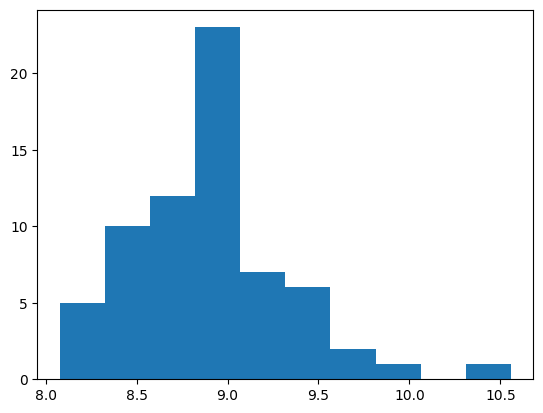

In [573]:
plt.hist(data=log_edf,x='disposable_income',bins=10)

In [574]:
sk = skew(log_edf['disposable_income'])
kr = kurtosis(log_edf['disposable_income'])
print(sk,kr)

0.9638109975736807 2.032814866771786


#### 사교육비 데이터 역시 정규성을 따르지 않기 때문에 log변환을 해주었다.

In [575]:
normaltest(log_edf['priv_edu'])

NormaltestResult(statistic=13.002214940533882, pvalue=0.0015017751004097989)

In [576]:
sk = skew(log_edf['priv_edu'])
kr = kurtosis(log_edf['priv_edu'])
print(sk,kr)

-0.8904720909214353 1.4495114276670735


두 데이터 모두왜도의 절대값이 3 미만이며, 첨도가 8미만이기 때문에 가처분소득 데이터가 정규성을 따른다고 판단할 수 있다.

In [577]:
test_df1 = concat([education_level,log_edf['priv_edu'],log_edf['disposable_income']],axis=1)
test_df1.dropna()

,education_level_1,education_level_2,priv_edu,disposable_income
9,1.0,0.0,4.204693,8.692490
19,1.0,0.0,2.302585,8.934060
31,1.0,0.0,5.783825,9.159468
56,0.0,1.0,2.197225,8.514590
75,1.0,0.0,4.882802,8.663369
82,1.0,0.0,4.499810,8.828641
99,0.0,1.0,4.709530,10.557660
103,0.0,1.0,4.158883,9.038959
107,1.0,0.0,3.433987,9.024854
108,1.0,0.0,4.488636,8.893573


In [578]:
model =ols('priv_edu~disposable_income+education_level_1+education_level_2',data=test_df1)
fit = model.fit()
fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     10.44
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           0.000151
Time:                        14:16:07   Log-Likelihood:                -63.403
No. Observations:                  56   AIC:                             132.8
Df Residuals:                      53   BIC:                             138.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.7403      1.414     -2.645      0.011      -6.576      -0.904
disposable_income     1.0850      0.239      4.542      0.000       0.606       1.564
education_level_1    -1.7900      0.711     -2.519      0.015      -3.215      -0.365
education_level_2    -1.9503      0.727     -2.683      0.010      -3.408      -0.492
==============================================================================
Omnibus:                        6.327   Durbin-Watson:                   2.517
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                5.509
Skew:                          -0.745   Prob(JB):                       0.0636
Kurtosis:                       3.376   Cond. No.                     3.89e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.96e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

$$ log(사교육비) = 1.08 \times log(가처분소득) -1.79 \times 고졸 이하() - 1.95 \times 대졸이상$$

##### 가설 2) 부유한 가정 환경이(긍정적 경제 상태) 사교육비 지출과 양의 상관관계를 갖는다.

 사용할 변수
 |변수 이름|설명|
 |---|---|
 |7개 권여별 지역 구분|1. 수도권 2. 비수도권|
 |주택 유형|1.일반 주택 2. 아파트 3. 복지 주거시설|
 |집 값| 집의 가격(만원)|
 |생활 만족도((나)가족의 수입 만족도, (다)주거 환경 만족도,(아)전반적 만족도)| 1. 불만족, 2.보통, 3. 만족||
 |가처분 소득| 단위 (만원)|

In [ ]:
a=concat([district,edf['priv_edu']],axis=1)
a=a.query('priv_edu>0')
a.groupby('area').mean()

,priv_edu
area,
1,91.428571
2,73.628571


In [583]:
xdf = concat([log_edf['priv_edu'],district, house_type,log_edf['house_price'],log_edf['disposable_income'],residential_sat,family_sat,general_sat],axis=1)

In [590]:
xdf= xdf.dropna()

In [591]:
model = my_ols(xdf, 'priv_edu',['area','house_type','house_price','residential_sat','family_sat','general_sat','disposable_income'])
model.summary

['priv_edu', 'area', 'house_type', 'house_price', 'disposable_income', 'residential_sat', 'family_sat', 'general_sat']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     3.743
Date:                Thu, 17 Aug 2023   Prob (F-statistic):            0.00104
Time:                        15:53:56   Log-Likelihood:                -55.755
No. Observations:                  56   AIC:                             133.5
Df Residuals:                      45   BIC:                             155.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.8367      0.991     -2.861      0.006      -4.834      -0.840
area[T.2]               -0.1564      0.208     -0.750      0.457      -0.576       0.263
house_type[T.2]         -0.0815      0.212     -0.385      0.702      -0.508       0.345
house_type[T.3]         -0.1414      0.500     -0.283      0.779      -1.148       0.866
residential_sat[T.1]    -0.7924      0.462     -1.714      0.093      -1.723       0.139
residential_sat[T.2]    -1.1330      0.429     -2.640      0.011      -1.997      -0.269
residential_sat[T.3]    -0.9113      0.367     -2.484      0.017      -1.650      -0.173
family_sat[T.1]         -1.2486      0.596     -2.094      0.042      -2.449      -0.048
family_sat[T.2]         -1.1580      0.464     -2.496      0.016      -2.092      -0.224
family_sat[T.3]         -0.4300      0.433     -0.993      0.326      -1.303       0.442
general_sat[T.1]      1.038e-16   1.68e-16      0.618      0.540   -2.34e-16    4.42e-16
general_sat[T.2]        -1.3638      0.488     -2.793      0.008      -2.347      -0.380
general_sat[T.3]        -1.4729      0.539     -2.733      0.009      -2.558      -0.387
house_price              0.2272      0.101      2.250      0.029       0.024       0.431
disposable_income        0.8678      0.279      3.111      0.003       0.306       1.430
==============================================================================
Omnibus:                       10.280   Durbin-Watson:                   2.583
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.938
Skew:                          -0.924   Prob(JB):                      0.00695
Kurtosis:                       3.919   Cond. No.                     1.12e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.17e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [592]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


X = xdf.drop('priv_edu',axis=1)
y = xdf['priv_edu']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Initialize RFE with the model and select features to achieve the highest R-squared
best_r2 = -float('inf')
best_selected_indices = None

for n_features in range(1, X_train.shape[1] + 1):
    rfe = RFE(model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    selected_indices = np.where(rfe.support_)[0]
    # Predict on the validation set and calculate R-squared
    y_pred = model.fit(X_train.iloc[:, selected_indices], y_train).predict(X_test.iloc[:, selected_indices])
    r2 = r2_score(y_test, y_pred)
    
    if r2 > best_r2:
        best_r2 = r2
        best_selected_indices = selected_indices

# Print the best selected feature indices and their count
print("Best Selected Feature Indices:", best_selected_indices)
print("Number of Selected Features:", len(best_selected_indices))
print("Best R-squared:", best_r2)

Best Selected Feature Indices: [3 5]
Number of Selected Features: 2
Best R-squared: 0.3064584789110031


In [ ]:
aaa = concat([xdf['priv_edu'],xdf['area'], xdf['house_type'],xdf['residential_sat'],xdf['family_sat'],xdf['general_sat']], axis =1)
model = my_ols(aaa, 'priv_edu',['area','house_type','residential_sat','family_sat','general_sat'])
model.summary

['priv_edu', 'area', 'house_type', 'residential_sat', 'family_sat', 'general_sat']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.6586
Date:                Thu, 17 Aug 2023   Prob (F-statistic):              0.725
Time:                        11:38:55   Log-Likelihood:                -317.24
No. Observations:                  56   AIC:                             652.5
Df Residuals:                      47   BIC:                             670.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               36.9508     15.613      2.367      0.022       5.542      68.359
area[T.2]              -19.2290     21.492     -0.895      0.375     -62.464      24.006
house_type[T.2]        -18.3938     21.925     -0.839      0.406     -62.501      25.714
house_type[T.3]         -5.0746     48.103     -0.105      0.916    -101.845      91.696
residential_sat[T.1]    14.7956     34.360      0.431      0.669     -54.328      83.919
residential_sat[T.2]    32.2408     23.007      1.401      0.168     -14.044      78.525
residential_sat[T.3]   -10.0856     22.812     -0.442      0.660     -55.977      35.805
family_sat[T.1]        -17.7550     52.735     -0.337      0.738    -123.845      88.335
family_sat[T.2]         -2.7512     34.129     -0.081      0.936     -71.409      65.907
family_sat[T.3]         57.4570     26.615      2.159      0.036       3.915     110.999
general_sat[T.1]              0          0        nan        nan           0           0
general_sat[T.2]        19.4156     14.099      1.377      0.175      -8.948      47.779
general_sat[T.3]        17.5352     17.695      0.991      0.327     -18.062      53.132
==============================================================================
Omnibus:                       45.775   Durbin-Watson:                   2.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.138
Skew:                           2.250   Prob(JB):                     1.71e-40
Kurtosis:                      10.632   Cond. No.                     1.22e+33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-64. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x = numeric_df1['pub_edu']
y = numeric_df1['priv_edu']
a = concat([x,y],axis=1)
x,scailing(a,'priv_edu')

(1       0
 2       0
 3       0
 4       6
 5       0
        ..
 7861    0
 7862    4
 7863    2
 7864    0
 7865    0
 Name: pub_edu, Length: 7865, dtype: int32,
 (       pub_edu
  0    -0.215716
  1    -0.215716
  2    -0.215716
  3     0.128878
  4    -0.215716
  ...        ...
  7860 -0.215716
  7861  0.014013
  7862 -0.100852
  7863 -0.215716
  7864 -0.215716
  
  [7865 rows x 1 columns],
        priv_edu
  0    -0.291559
  1    -0.291559
  2    -0.291559
  3     4.333823
  4    -0.291559
  ...        ...
  7860 -0.291559
  7861  4.435109
  7862  1.734156
  7863  0.721299
  7864 -0.291559
  
  [7865 rows x 1 columns]))

In [ ]:
final_df = concat([edf, cat_df],axis = 1).dropna()
final_df

,disposable_income,age,house_price,pub_edu,priv_edu,num_of_child,apparel,insurance,entertainment,transportation,...,residential_sat_3,family_sat_1,family_sat_2,family_sat_3,job_sat_1,job_sat_2,job_sat_3,general_sat_1,general_sat_2,general_sat_3
9,5958.0,44.0,21000.0,88.0,67.0,1.0,17.0,34.0,20.0,51.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
19,7586.0,50.0,17000.0,3.0,10.0,2.0,45.0,20.0,27.0,26.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
31,9504.0,49.0,70000.0,19.0,325.0,1.0,28.0,37.0,43.0,50.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
56,4987.0,51.0,570.0,42.0,9.0,1.0,2.0,31.0,14.0,31.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
75,5787.0,53.0,10000.0,5.0,132.0,2.0,9.0,8.0,33.0,45.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
82,6827.0,44.0,90000.0,5.0,90.0,2.0,31.0,19.0,17.0,27.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
99,38471.0,49.0,47000.0,5.0,111.0,1.0,25.0,74.0,13.0,28.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
103,8425.0,46.0,8000.0,1.0,64.0,1.0,24.0,109.0,31.0,65.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
107,8307.0,45.0,7000.0,3.0,31.0,3.0,23.0,12.0,5.0,91.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
108,7285.0,43.0,65000.0,6.0,89.0,2.0,25.0,24.0,24.0,239.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.decomposition import PCA
# 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
from pca import pca 


In [ ]:
X= final_df.drop('priv_edu',axis=1)
y= final_df['priv_edu']

In [ ]:
model = pca(n_components=len(final_df.columns))
fit = model.fit_transform(X)
fit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >[WARNING]: >Number of components can not be more then number of features. n_components is set to 34
[pca] >The PCA reduction is performed on the [35] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[34]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':       disposable_income           age   house_price       pub_edu  \
 PC1        3.916897e-02 -2.974751e-05  9.992321e-01 -4.520732e-05   
 PC2        9.992273e-01  9.193989e-05 -3.916856e-02 -1.021581e-04   
 PC3        1.073693e-03  2.287474e-03 -9.922384e-04 -1.093750e-02   
 PC4        2.893470e-03 -3.393137e-02  1.891456e-04 -1.256829e-01   
 PC5       -5.528600e-04  5.361061e-02  8.913578e-05  2.828824e-01   
 PC6        6.190033e-04  4.887311e-02  7.543999e-05  9.125405e-01   
 PC7        4.371154e-04 -8.381083e-02 -1.466652e-04  2.229226e-01   
 PC8       -3.928758e-04 -7.327392e-02  3.323783e-05  4.109587e-02   
 PC9        5.974910e-05 -1.145114e-01  5.814959e-05 -1.228724e-01   
 PC10       4.132133e-05 -3.488021e-01 -3.289944e-05 -6.566692e-03   
 PC11      -3.592929e-05 -9.158498e-01 -2.182955e-05  6.487597e-02   
 PC12       2.185570e-05 -3.283052e-02  7.494583e-06 -1.481762e-02   
 PC13       2.246247e-05  4.961951e-02 -1.341380e-05  7.692974e-03   
 PC14   

In [ ]:
topfit = fit['topfeat']
topfit

,PC,feature,loading,type
0,PC1,house_price,9.992321e-01,best
1,PC2,disposable_income,9.992273e-01,best
2,PC3,transportation,9.989549e-01,best
3,PC4,meal_out,-9.117396e-01,best
4,PC5,insurance,8.868845e-01,best
5,PC6,pub_edu,9.125405e-01,best
6,PC7,entertainment,9.407416e-01,best
7,PC8,apparel,7.176871e-01,best
8,PC9,apparel,-6.544972e-01,best
9,PC10,utility_bills,7.573958e-01,best


In [ ]:
best = topfit.query("type=='best'")
feature = list(set(list(best['feature'])))
feature

['apparel',
 'disposable_income',
 'employee_type_3',
 'house_type_1',
 'general_sat_2',
 'employee_type_2',
 'house_type_3',
 'family_sat_1',
 'age',
 'job_sat_2',
 'num_of_child',
 'entertainment',
 'family_sat_2',
 'house_price',
 'residential_sat_1',
 'meal_out',
 'utility_bills',
 'job_sat_1',
 'education_level_2',
 'income_sat_1',
 'employee_type_1',
 'transportation',
 'general_sat_3',
 'house_type_2',
 'income_sat_3',
 'insurance',
 'pub_edu']

In [ ]:
feature

['apparel',
 'disposable_income',
 'employee_type_3',
 'house_type_1',
 'general_sat_2',
 'employee_type_2',
 'house_type_3',
 'family_sat_1',
 'age',
 'job_sat_2',
 'num_of_child',
 'entertainment',
 'family_sat_2',
 'house_price',
 'residential_sat_1',
 'meal_out',
 'utility_bills',
 'job_sat_1',
 'education_level_2',
 'income_sat_1',
 'employee_type_1',
 'transportation',
 'general_sat_3',
 'house_type_2',
 'income_sat_3',
 'insurance',
 'pub_edu']

In [ ]:
ols = my_ols(final_df, 'priv_edu', feature)
ols.summary

['disposable_income', 'age', 'house_price', 'pub_edu', 'priv_edu', 'num_of_child', 'apparel', 'insurance', 'entertainment', 'transportation', 'phone', 'meal_out', 'utility_bills', 'house_type_1', 'house_type_2', 'house_type_3', 'employee_type_1', 'employee_type_2', 'employee_type_3', 'education_level_1', 'education_level_2', 'income_sat_1', 'income_sat_2', 'income_sat_3', 'residential_sat_1', 'residential_sat_2', 'residential_sat_3', 'family_sat_1', 'family_sat_2', 'family_sat_3', 'job_sat_1', 'job_sat_2', 'job_sat_3', 'general_sat_1', 'general_sat_2', 'general_sat_3']


C:\Users\yis82\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     2.084
Date:                Thu, 17 Aug 2023   Prob (F-statistic):             0.0276
Time:                        11:35:47   Log-Likelihood:                -293.31
No. Observations:                  56   AIC:                             636.6
Df Residuals:                      31   BIC:                             687.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -38.1528     69.028     -0.553      0.584    -178.937     102.631
apparel               0.9275      1.199      0.774      0.445      -1.518       3.373
disposable_income     0.0005      0.003      0.202      0.841      -0.005       0.006
employee_type_3      -2.3907     26.713     -0.089      0.929     -56.872      52.090
house_type_1          6.2175     22.812      0.273      0.787     -40.308      52.743
general_sat_2        -5.3812     37.310     -0.144      0.886     -81.475      70.712
employee_type_2      -5.1092     26.159     -0.195      0.846     -58.462      48.243
house_type_3        -13.6671     51.242     -0.267      0.791    -118.176      90.842
family_sat_1       -108.4025     76.333     -1.420      0.166    -264.085      47.281
age                   0.3534      2.770      0.128      0.899      -5.296       6.003
job_sat_2           -56.0690     30.685     -1.827      0.077    -118.652       6.514
num_of_child        -11.7250     11.273     -1.040      0.306     -34.717      11.267
entertainment         0.1114      0.667      0.167      0.868      -1.248       1.471
family_sat_2        -14.5845     40.634     -0.359      0.722     -97.458      68.289
house_price           0.0008      0.000      2.208      0.035    5.99e-05       0.002
residential_sat_1   -23.7515     44.741     -0.531      0.599    -115.001      67.498
meal_out              1.0801      0.376      2.874      0.007       0.313       1.847
utility_bills        -0.0118      1.630     -0.007      0.994      -3.336       3.312
job_sat_1           -38.1299     37.837     -1.008      0.321    -115.298      39.038
education_level_2    36.5509     31.389      1.164      0.253     -27.467     100.569
income_sat_1         31.3239     28.054      1.117      0.273     -25.893      88.540
employee_type_1     -30.6529     30.423     -1.008      0.321     -92.702      31.396
transportation       -0.0993      0.129     -0.768      0.448      -0.363       0.164
general_sat_3       -32.7716     39.284     -0.834      0.411    -112.892      47.349
house_type_2        -30.7032     26.508     -1.158      0.256     -84.766      23.360
income_sat_3         18.2647     30.086      0.607      0.548     -43.095      79.625
insurance            -0.2936      0.461     -0.636      0.529      -1.235       0.647
pub_edu              -0.2029      0.694     -0.292      0.772      -1.618       1.212
==============================================================================
Omnibus:                       10.354   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.589
Skew:                           0.827   Prob(JB):                      0.00502
Kurtosis:                       4.343   Cond. No.                     1.42e+16
======================

In [ ]:
X= final_df.drop('priv_edu',axis=1)
y= final_df['priv_edu']


In [ ]:
y_pred = ols.fit.predict(X)
y_pred


9        73.304549
19       51.283689
31      173.531431
56       -8.752139
75      148.001057
82      116.162363
99      128.430631
103      78.940703
107      10.147298
108      55.117256
114     106.864507
137     193.684027
217      96.563877
4250    115.594326
5486     23.513440
5699     87.474762
5703     28.480336
5755     81.007511
5790     50.175687
5811     63.359806
5819     78.885661
5942     87.455287
6011     29.979349
6015     52.473718
6150     85.575518
6177    130.618656
6218     82.841442
6220    101.885101
6231     66.465669
6243    134.147162
6268    215.300907
6392     66.287669
6422    136.823094
6433    128.320496
6439     40.922214
6445     89.899880
6596     81.408717
6602     61.661280
6681     16.747896
6814     62.601519
6826     23.230098
6960     71.649929
6962     -5.608493
6975     67.915091
6977     59.581622
6981    333.484198
6987     71.095802
7007     61.905247
7091     41.519664
7092     42.150842
7186    128.607457
7188     64.773400
7315     48.

ValueError: x and y must be the same size

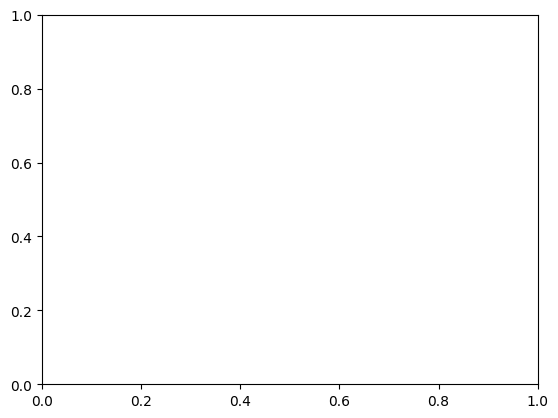

In [ ]:
plt.scatter(edf['priv_edu'],y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red')  # Diagonal line for reference
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs. Predicted Values')
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Sample data - Replace this with your dataset
# X should be a pandas DataFrame containing the features, and y should be a pandas Series containing the target variable.
# For example:
# X = pd.DataFrame(data, columns=['feature1', 'feature2', ...])
# y = pd.Series(target)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LassoCV model to perform L1 regularization and automatically select the best alpha (regularization strength)
lasso_model = LassoCV(cv=5)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Get the best alpha (regularization strength) selected by cross-validation
best_alpha = lasso_model.alpha_

# Get the coefficients of the selected features
selected_features = X.columns[lasso_model.coef_ != 0]

# Print the results
print("Best alpha (regularization strength):", best_alpha)
print("Selected features:", selected_features)

# Predict on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on test set:", mse)

Best alpha (regularization strength): 853.8583973809467
Selected features: Index(['disposable_income', 'house_price'], dtype='object')
Mean Squared Error (MSE) on test set: 2572.7841420546183


InvalidIndexError: ('disposable_income', 11        21000.0
12        21000.0
21        25000.0
22       100000.0
23       100000.0
           ...   
12008     27000.0
12011     70000.0
12012     70000.0
12013     30000.0
12014     30000.0
Name: house_price, Length: 2627, dtype: float64)